In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from z_test import z_test

ModuleNotFoundError: No module named 'z_test'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28899 entries, 0 to 28898
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         28899 non-null  int64         
 1   name               28899 non-null  object        
 2   market             28899 non-null  object        
 3   funding_total_usd  28899 non-null  int64         
 4   status             28339 non-null  object        
 5   funding_rounds     28899 non-null  int64         
 6   State_code         28873 non-null  object        
 7   City               28836 non-null  object        
 8   founded_at         23793 non-null  datetime64[ns]
 9   company_name       2958 non-null   object        
 10  acquired_at        2957 non-null   datetime64[ns]
 11  price_amount       914 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 2.6+ MB


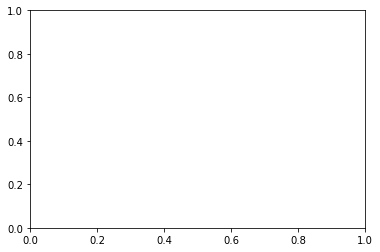

In [70]:
data = pd.read_csv('cleaned.csv')
data['acquired_at'] = pd.to_datetime(data.acquired_at, errors = 'coerce')
data['founded_at'] = pd.to_datetime(data.founded_at, errors = 'coerce')
fig, ax = plt.subplots()
data.info()

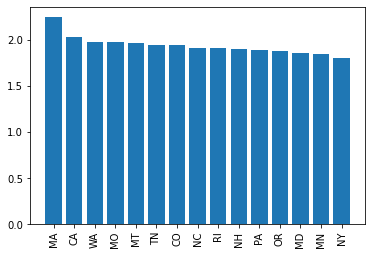

In [167]:
fig = plt.figure()
average_funding_per_state = data.groupby(by = 'State_code').funding_rounds.mean().nlargest(15)
plt.xticks(rotation=90)
plt.ticklabel_format(style = 'plain')
ax = plt.bar(average_funding_per_state.index,average_funding_per_state.values) 

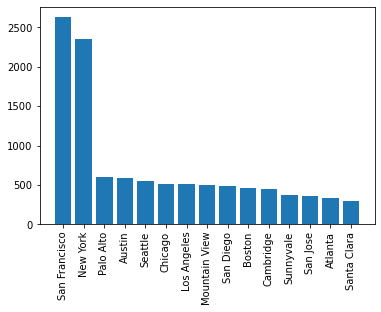

In [170]:
fig = plt.figure()
average_funding_per_state = data.groupby(by = 'City').size().nlargest(15)
plt.xticks(rotation=90)
plt.ticklabel_format(style = 'plain')
ax = plt.bar(average_funding_per_state.index,average_funding_per_state.values) 

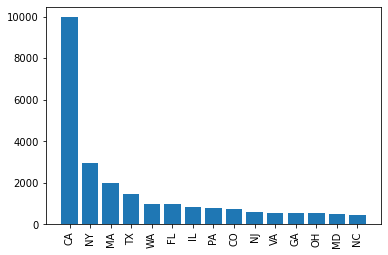

In [169]:
fig = plt.figure()
average_funding_per_state = data.groupby(by = 'State_code').size().nlargest(15)
plt.xticks(rotation=90)
plt.ticklabel_format(style = 'plain')
ax = plt.bar(average_funding_per_state.index,average_funding_per_state.values) 

<AxesSubplot:>

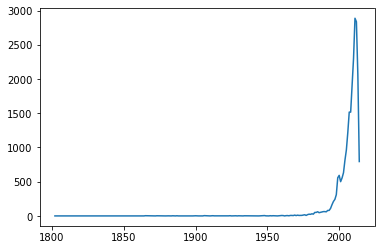

In [18]:
data.founded_at.dt.year.value_counts().sort_index().plot()

<AxesSubplot:>

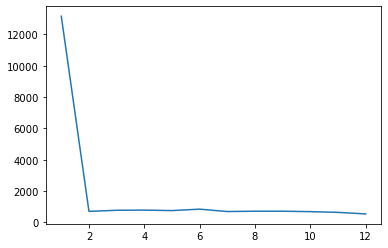

In [85]:
data.founded_at.dt.month.value_counts().sort_index().plot()
#funding rounds per categorys
#market and number of start ups 

<AxesSubplot:>

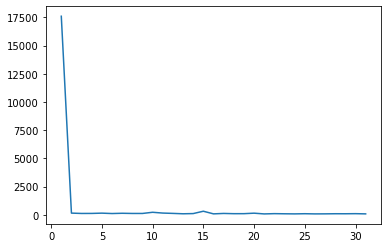

In [89]:
data.founded_at.dt.day.value_counts().sort_index().plot()

In [143]:
other_count = 0
first_count = 0
for i in range(data['founded_at'].size):
    if (data['founded_at'][i].month == 1) and (data['founded_at'][i].day == 1):
        
        first_count+= 1
    else:
        other_count+= 1
print(first_count/(first_count+other_count)) 
#percentage of companies "founded" on january first


0.5974658869395711


<AxesSubplot:xlabel='founded_at'>

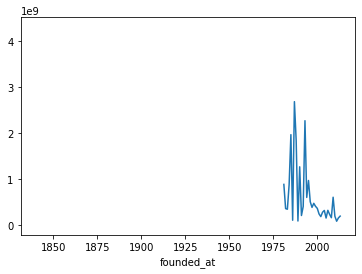

In [121]:
data.groupby(data.founded_at.dt.year).price_amount.mean().plot()

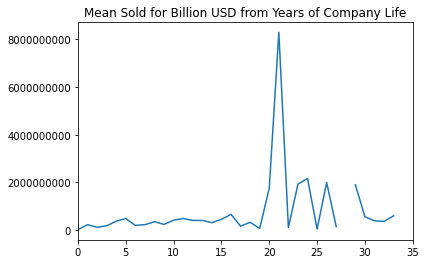

In [55]:
#best year into company to sell
best_year = data.groupby(data.acquired_at.dt.year - data.founded_at.dt.year).price_amount.mean()
plt.ticklabel_format(style = 'plain')
plt.title('Mean Sold for Billion USD from Years of Company Life')
ax = plt.plot(best_year.index,best_year.values) 
plt.xlim((0, 35))

plt.savefig('graphs/Best_Year_to_Sell.png',bbox_inches = 'tight')
#average amount of funding per market

<AxesSubplot:xlabel='time_running'>

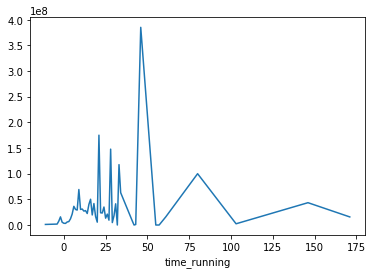

In [87]:
data['time_running'] = (data.acquired_at.dt.year - data.founded_at.dt.year)
data.groupby(data.time_running).funding_total_usd.mean().plot()
#how long does it take a company to reach the highest funding total?

In [ ]:
fig, ax = 
for i in range(17):
    groupby()

In [67]:
funding_mean = data.groupby(data.market).funding_total_usd.mean().sort_values(ascending=False)
selling_mean = data.groupby(data.market).price_amount.mean().sort_values(ascending=False)
time_running_mean = data.groupby(data.market).time_running.mean().sort_values(ascending=False)

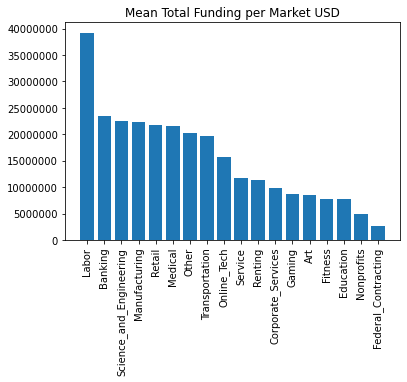

In [63]:
plt.xticks(rotation=90)
plt.ticklabel_format(style = 'plain')
plt.title('Mean Total Funding per Market USD')
ax = plt.bar(funding_mean.index,funding_mean.values)
plt.savefig('graphs/Mean_Total_Funding_per_Market_USD.png',bbox_inches = 'tight')
#average amount of funding per market

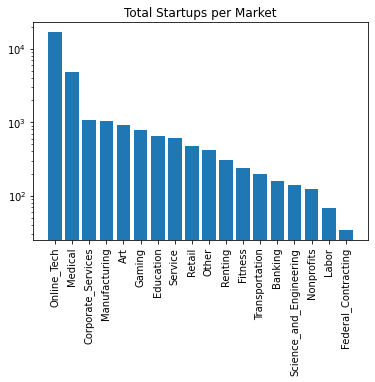

In [175]:
market_totals = data.groupby(data.market).size().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.ticklabel_format(style = 'plain')
plt.yscale('log')
plt.title('Total Startups per Market')
ax = plt.bar(market_totals.index,market_totals.values)
plt.savefig('graphs/total_startups_per_Market.png',bbox_inches = 'tight')
#average amount of funding per market

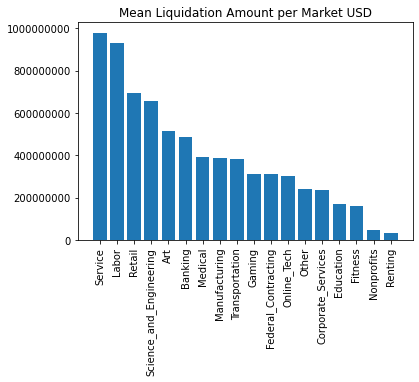

In [65]:
plt.xticks(rotation=90)
plt.ticklabel_format(style = 'plain')
plt.title('Mean Liquidation Amount per Market USD')
ax = plt.bar(selling_mean.index,selling_mean.values) 
plt.savefig('graphs/Mean_Liquidation_Amount_per_Market_USD.png',bbox_inches = 'tight')
#average company sale


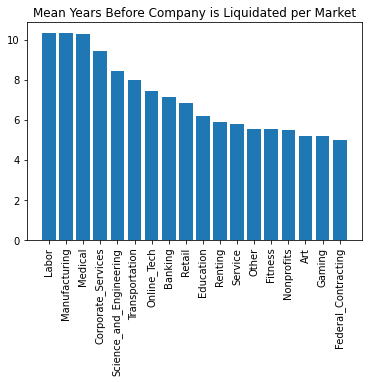

In [66]:
plt.xticks(rotation=90)
plt.title('Mean Years Before Company is Liquidated per Market')
ax = plt.bar(time_running_mean.index,time_running_mean.values)
plt.savefig('graphs/Mean_Years_Before_Company_per_Market.png',bbox_inches = 'tight')
#average company lifespan

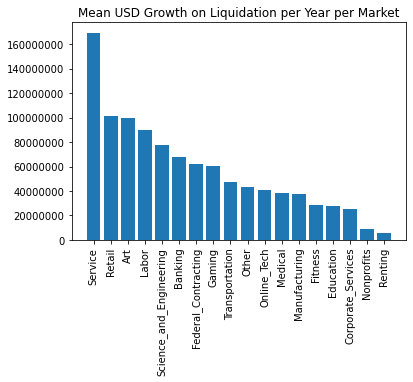

In [68]:
price_by_time_running_mean = (data.groupby(data.market).mean()['price_amount']/data.groupby(data.market).mean()['time_running']).sort_values(ascending=False)
plt.xticks(rotation=90)
plt.ticklabel_format(style = 'plain')
plt.title('Mean USD Growth on Liquidation per Year per Market')
ax = plt.bar(price_by_time_running_mean.index,price_by_time_running_mean.values,color=colors) 
plt.savefig('graphs/Mean_USD_Growth_per_Year_per_Market_Color.png',bbox_inches = 'tight')

#per year value of the company increase
# price they buy dividdd the number of years

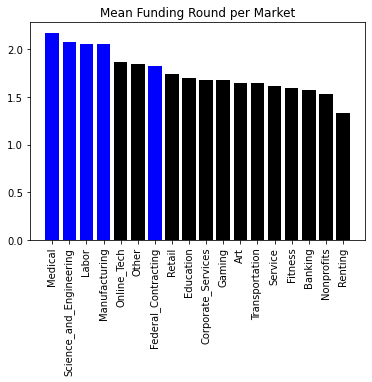

In [161]:
funding_round_mean = data.groupby(data.market).funding_rounds.mean().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.ticklabel_format(style = 'plain')
plt.title('Mean Funding Round per Market')
ax = plt.bar(funding_round_mean.index,funding_round_mean.values, color=colors) 
# plt.savefig('graphs/Mean_Funding_Round_per_Market_Color.png',bbox_inches = 'tight')
#funding


In [152]:
Medical_Rounds = data[data.market == 'Medical']['funding_rounds']
Science_Rounds = data[data.market == 'Science_and_Engineering']['funding_rounds']
stat, p_val = stats.ttest_ind(Medical_Rounds, Science_Rounds, equal_var=False)
alpha = .05
p_val #0.47805572692344045
p_val < alpha #True


False

In [160]:
alpha = .05
market_list = ['Medical','Science_and_Engineering', 'Labor', 'Manufacturing','Online_Tech','Other', 'Federal_Contracting','Retail','Education','Corporate_Services','Gaming', 'Art', 'Transportation', 'Service', 'Fitness','Banking', 'Nonprofits', 'Renting']
colors = []
for market in market_list:
    current_c = 'b'
    Market_Rounds = data[data.market == market]['funding_rounds']
    stat, p_val = stats.ttest_ind(Market_Rounds, Medical_Rounds, equal_var=False)
    if (p_val < alpha):
        current_c = 'r'
    colors.append(current_c)
    print(f'{market} : {(p_val < alpha)}')



Medical : False
Science_and_Engineering : False
Labor : False
Manufacturing : False
Online_Tech : True
Other : True
Federal_Contracting : False
Retail : True
Education : True
Corporate_Services : True
Gaming : True
Art : True
Transportation : True
Service : True
Fitness : True
Banking : True
Nonprofits : True
Renting : True


In [89]:
#service and labor outlires
data[(data['market']=='Service') & (data['price_amount']>0)]

,Unnamed: 0,name,market,funding_total_usd,status,funding_rounds,State_code,City,founded_at,company_name,acquired_at,price_amount,time_running
3810,3810,ForeSee,Service,20000000,acquired,1,MI,Ann Arbor,2001-09-01,ForeSee,2013-12-23,2.000000e+08,12.0
6391,6391,iExplore,Service,14000000,acquired,4,IL,Chicago,1999-01-01,iExplore,2007-02-28,3.253000e+07,8.0
7584,7584,ITA Software,Service,100000000,acquired,1,MA,Cambridge,1996-01-01,ITA Software,2011-04-13,7.000000e+08,15.0
12912,12912,Off & Away,Service,3250000,acquired,2,WA,Seattle,2009-12-01,Off & Away,2011-12-01,5.000000e+06,2.0
13868,13868,Parature,Service,30234350,acquired,3,VA,Herndon,2000-06-15,Parature,2014-01-06,1.000000e+08,14.0
18393,18393,SideStep,Service,32000000,acquired,4,CA,Santa Clara,1999-11-01,SideStep,2007-12-01,1.800000e+08,8.0
22144,22144,TravelCLICK,Service,0,acquired,2,NY,New York,1999-01-01,TravelCLICK,2014-05-12,9.300000e+08,15.0
22266,22266,TripAdvisor,Service,0,acquired,1,MA,Newton,2000-02-01,TripAdvisor,2004-03-16,2.100000e+08,4.0
25292,25292,ZipList,Service,4500000,acquired,2,VA,Reston,2008-01-01,ZipList,2012-04-11,1.400000e+07,4.0
27238,27238,Caviar,Service,15000000,acquired,2,CA,San Francisco,2012-07-01,Caviar,2014-08-04,9.000000e+07,2.0


In [88]:
data[data['price_amount']>200000000].nlargest(25, 'price_amount')

,Unnamed: 0,name,market,funding_total_usd,status,funding_rounds,State_code,City,founded_at,company_name,acquired_at,price_amount,time_running
24285,24285,WhatsApp,Online_Tech,58250000,acquired,3,CA,Santa Clara,2009-01-01,WhatsApp,2014-02-19,1.900000e+10,5.0
28583,28583,Concur Technologies,Service,291754092,acquired,2,WA,Redmond,1993-08-01,Concur Technologies,2014-09-18,8.300000e+09,21.0
10138,10138,McAfee,Online_Tech,0,acquired,1,CA,Santa Clara,1987-08-14,McAfee,2010-08-19,7.680000e+09,23.0
26477,26477,Broadcast.com,Art,0,acquired,1,TX,Dallas,1995-09-01,Broadcast.com,1999-11-01,5.700000e+09,4.0
23092,23092,Varian Semiconductor Equipment Associates,Manufacturing,4800000,acquired,1,MA,Gloucester,1999-01-01,Varian Semiconductor Equipment Associates,2011-05-04,4.900000e+09,12.0
5575,5575,HealthCare Partners,Online_Tech,0,acquired,1,CA,Torrance,1992-01-01,HealthCare Partners,2012-11-01,4.420000e+09,20.0
17330,17330,Sabre,Online_Tech,645496464,acquired,1,TX,Southlake,1960-01-01,Sabre,2006-12-01,4.300000e+09,46.0
21705,21705,TIBCO Software,Online_Tech,2000000,acquired,1,CA,Palo Alto,1985-01-01,TIBCO Software,2014-09-29,4.300000e+09,29.0
12077,12077,Netscape,Art,0,acquired,1,CA,Mountain View,1994-04-04,Netscape,1998-11-28,4.200000e+09,4.0
6348,6348,Idenix Pharmaceuticals,Medical,132000000,acquired,3,MA,Cambridge,NaT,Idenix Pharmaceuticals,2014-06-09,3.850000e+09,NaN


In [85]:
data[data['funding_total_usd']>200000000].nlargest(25, 'funding_total_usd')

,Unnamed: 0,name,market,funding_total_usd,status,funding_rounds,State_code,City,founded_at,company_name,acquired_at,price_amount
23304,23304,Verizon Communications,Online_Tech,30079503000,operating,5,NY,New York,1983-10-07,NaN,NaT,NaN
27952,27952,Clearwire,Online_Tech,5700000000,acquired,4,WA,Kirkland,2003-10-01,Clearwire,2012-12-17,NaN
27516,27516,Charter Communications,Online_Tech,5162513431,operating,2,CT,Stamford,1993-01-01,NaN,NaT,NaN
3449,3449,First Data Corporation,Online_Tech,3500000000,operating,1,GA,Atlanta,1971-01-01,NaN,NaT,NaN
18426,18426,sigmacare,Medical,2600000000,operating,1,NY,New York,2005-01-01,NaN,NaT,NaN
3054,3054,Facebook,Other,2425700000,operating,11,CA,Menlo Park,2004-02-04,NaN,NaT,NaN
27066,27066,Carestream,Medical,2400000000,operating,1,NY,Rochester,2007-01-01,NaN,NaT,NaN
25123,25123,Zebra Technologies,Online_Tech,2000000000,operating,1,IL,Lincolnshire,1991-01-01,NaN,NaT,NaN
15798,15798,Quad/Graphics,Other,1900000000,operating,1,WI,Sussex,1971-01-01,NaN,NaT,NaN
19287,19287,Solyndra,Manufacturing,1567504319,closed,8,CA,Fremont,2005-01-01,NaN,NaT,NaN
